1. Understand the problem and read in the data
2. Pre-process data, train-test split
3. Build and compile a deep learning model

# Understand the problem and read in the data

This Kaggle challenge is about predicting the onset of diabetes in 5 years or less. 
Target variable is Outcome. 1 = yes, the person became diabetic in 5 years, and 0 = No, 
the person did not. This is a binary classification problem. Please check out the Kaggle
link here to see feature 
details - https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

In [178]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

In [179]:
%pwd

'C:\\Users\\kesha'

In [180]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [181]:
path = 'C:\Data_Science_Engineering_Methonds_And_Tools\Info_6105\Module_9\Assignment_3'

In [182]:
df = pd.read_csv(f'{path}/pima-indians-diabetes.data',header = None)
print(df.shape)
df.head(2)

(768, 9)


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


# Pre-process data, train-val-test split

In [183]:
#Separate out X and Y

def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


df_train_val,df_test = mydf_splitter(df,610)

print(df_train_val.shape,df_test.shape)
print(df_train_val.head())
print(df_test.head())

(610, 9) (158, 9)
   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1
      0    1   2   3    4     5      6   7  8
610   3  106  54  21  158  30.9  0.292  24  0
611   3  174  58  22  194  32.9  0.593  36  1
612   7  168  88  42  321  38.2  0.787  40  1
613   6  105  80  28    0  32.5  0.878  26  0
614  11  138  74  26  144  36.1  0.557  50  1


In [184]:
# Splitting the Y Variable from the dataset

X = df_train_val.iloc[:, :8]
Y = df_train_val.iloc[:, 8:9]
print(X.shape)
print(Y.shape)


(610, 8)
(610, 1)


In [186]:
#Scaling the dataset, first with the training and validation dataset.

from sklearn.preprocessing import MinMaxScaler

data = X
scaler = MinMaxScaler(feature_range=(0,1))
scaler = MinMaxScaler()
scaler.fit(data)
df_train_val1 = pd.DataFrame(scaler.transform(data))

print(df_train_val1.head())


          0         1         2         3         4         5         6  \
0  0.352941  0.747475  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.429293  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.924242  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0.449495  0.540984  0.232323  0.111111  0.418778  0.038002   
4  0.000000  0.691919  0.327869  0.353535  0.198582  0.642325  0.943638   

          7  
0  0.483333  
1  0.166667  
2  0.183333  
3  0.000000  
4  0.200000  


In [187]:
X=df_train_val1

In [188]:
#Splitting the Y variable from the dataset

(X_train, X_val, Y_train, Y_val) = train_test_split(X, Y, random_state = 1)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(457, 8) (153, 8) (457, 1) (153, 1)


In [189]:
print(X_train.head(), X_val.head(), Y_train.head(), Y_val.head())

            0         1         2         3         4         5         6  \
255  0.058824  0.570707  0.524590  0.353535  0.000000  0.500745  0.198548   
433  0.117647  0.702020  0.614754  0.000000  0.000000  0.381520  0.038002   
61   0.470588  0.671717  0.590164  0.000000  0.000000  0.490313  0.081981   
532  0.058824  0.434343  0.540984  0.525253  0.076832  0.615499  0.358241   
259  0.647059  0.782828  0.622951  0.282828  0.177305  0.496274  0.544406   

            7  
255  0.000000  
433  0.133333  
61   0.300000  
532  0.133333  
259  0.500000               0         1         2         3         4         5         6  \
49   0.411765  0.530303  0.000000  0.000000  0.000000  0.000000  0.096926   
237  0.000000  0.904040  0.737705  0.272727  0.000000  0.657228  0.259607   
195  0.294118  0.797980  0.688525  0.414141  0.248227  0.587183  0.135354   
596  0.000000  0.338384  0.622951  0.000000  0.000000  0.675112  0.049530   
197  0.176471  0.540404  0.508197  0.131313  0.056738  0

# Build and compile a deep learning model

In [208]:
# Build the deep neural network
model = Sequential()
model.add(Dense(10, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(6, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  """


In [209]:
# Compile the DNN

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [224]:
# Fit the DNN with your train data

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),  nb_epoch=100, batch_size=5)

Train on 457 samples, validate on 153 samples
Epoch 1/100
457/457 [==============================] - 0s 247us/step - loss: 0.4652 - accuracy: 0.7724 - val_loss: 0.5387 - val_accuracy: 0.7778
Epoch 2/100
325/457 [====================>.........] - ETA: 0s - loss: 0.4541 - accuracy: 0.7723

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


457/457 [==============================] - 0s 207us/step - loss: 0.4640 - accuracy: 0.7681 - val_loss: 0.5373 - val_accuracy: 0.7647
Epoch 3/100
457/457 [==============================] - 0s 220us/step - loss: 0.4637 - accuracy: 0.7681 - val_loss: 0.5383 - val_accuracy: 0.7516
Epoch 4/100
457/457 [==============================] - 0s 212us/step - loss: 0.4633 - accuracy: 0.7746 - val_loss: 0.5369 - val_accuracy: 0.7778
Epoch 5/100
457/457 [==============================] - 0s 229us/step - loss: 0.4625 - accuracy: 0.7681 - val_loss: 0.5378 - val_accuracy: 0.7647
Epoch 6/100
457/457 [==============================] - 0s 223us/step - loss: 0.4620 - accuracy: 0.7637 - val_loss: 0.5363 - val_accuracy: 0.7778
Epoch 7/100
457/457 [==============================] - 0s 231us/step - loss: 0.4619 - accuracy: 0.7812 - val_loss: 0.5365 - val_accuracy: 0.7712
Epoch 8/100
457/457 [==============================] - 0s 214us/step - loss: 0.4615 - accuracy: 0.7659 - val_loss: 0.5367 - val_accuracy: 0.77

457/457 [==============================] - 0s 229us/step - loss: 0.4439 - accuracy: 0.7856 - val_loss: 0.5254 - val_accuracy: 0.7647
Epoch 59/100
457/457 [==============================] - 0s 227us/step - loss: 0.4437 - accuracy: 0.7899 - val_loss: 0.5251 - val_accuracy: 0.7712
Epoch 60/100
457/457 [==============================] - 0s 205us/step - loss: 0.4431 - accuracy: 0.7877 - val_loss: 0.5241 - val_accuracy: 0.7712
Epoch 61/100
457/457 [==============================] - 0s 227us/step - loss: 0.4422 - accuracy: 0.7768 - val_loss: 0.5275 - val_accuracy: 0.7908
Epoch 62/100
457/457 [==============================] - 0s 210us/step - loss: 0.4451 - accuracy: 0.7899 - val_loss: 0.5230 - val_accuracy: 0.7712
Epoch 63/100
457/457 [==============================] - 0s 231us/step - loss: 0.4437 - accuracy: 0.7856 - val_loss: 0.5232 - val_accuracy: 0.7712
Epoch 64/100
457/457 [==============================] - 0s 273us/step - loss: 0.4430 - accuracy: 0.7965 - val_loss: 0.5220 - val_accuracy

In [227]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [228]:
#Training Set Accuracy
scores_train_set = model.evaluate(X_train, Y_train)
print("Accuracy: %.2f%%" %(scores_train_set[1]*100))

457/457 [==============================] - 0s 22us/step
Accuracy: 78.56%


In [229]:
#Validation Set Accuracy

scores_val_set = model.evaluate(X_val, Y_val)
print ("Accuracy: %.2f%%" %(scores_val_set[1]*100))

153/153 [==============================] - 0s 26us/step
Accuracy: 76.47%


In [230]:
#Pre-Processing the Test Set

df_test.head()

,0,1,2,3,4,5,6,7,8
610,3,106,54,21,158,30.9,0.292,24,0
611,3,174,58,22,194,32.9,0.593,36,1
612,7,168,88,42,321,38.2,0.787,40,1
613,6,105,80,28,0,32.5,0.878,26,0
614,11,138,74,26,144,36.1,0.557,50,1


In [231]:
X = df_test.iloc[:, :8]
Y = df_test.iloc[:, 8:9]
print(X.shape, Y.shape)

(158, 8) (158, 1)


In [232]:
data = X
scaler = MinMaxScaler(feature_range=(0,1))
scaler = MinMaxScaler()
scaler.fit(data)
df_test1 = pd.DataFrame(scaler.transform(data))

print(df_test1.head())

          0         1         2         3         4         5         6  \
0  0.230769  0.349650  0.473684  0.428571  0.292593  0.539267  0.111813   
1  0.230769  0.825175  0.508772  0.448980  0.359259  0.574171  0.301958   
2  0.538462  0.783217  0.771930  0.857143  0.594444  0.666667  0.424510   
3  0.461538  0.342657  0.701754  0.571429  0.000000  0.567190  0.481996   
4  0.846154  0.573427  0.649123  0.530612  0.266667  0.630017  0.279217   

          7  
0  0.061224  
1  0.306122  
2  0.387755  
3  0.102041  
4  0.591837  


In [233]:
X_test = df_test1
Y_test = Y
print(X_test.head())
print(Y_test.head())

          0         1         2         3         4         5         6  \
0  0.230769  0.349650  0.473684  0.428571  0.292593  0.539267  0.111813   
1  0.230769  0.825175  0.508772  0.448980  0.359259  0.574171  0.301958   
2  0.538462  0.783217  0.771930  0.857143  0.594444  0.666667  0.424510   
3  0.461538  0.342657  0.701754  0.571429  0.000000  0.567190  0.481996   
4  0.846154  0.573427  0.649123  0.530612  0.266667  0.630017  0.279217   

          7  
0  0.061224  
1  0.306122  
2  0.387755  
3  0.102041  
4  0.591837  
     8
610  0
611  1
612  1
613  0
614  1


In [234]:
# Evaluate the model
scores = model.evaluate(X_test, Y_test)
print ("Accuracy: %.2f%%" %(scores[1]*100))

158/158 [==============================] - 0s 25us/step
Accuracy: 77.22%


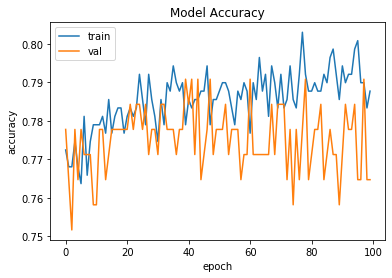

In [235]:
#summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


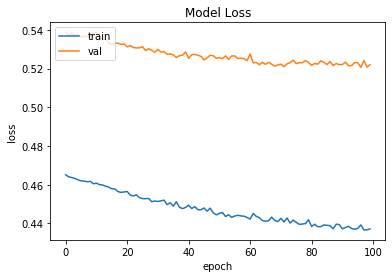

In [236]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [237]:
#Generating ROC curves and AUC Values


from sklearn.metrics import roc_curve
from sklearn.metrics import auc



In [243]:
y_pred = model.predict(X_test)
fpr_sq, tpr_sq, thresholds_sq = roc_curve(Y_test, y_pred)
auc_sq = auc(fpr_sq, tpr_sq)

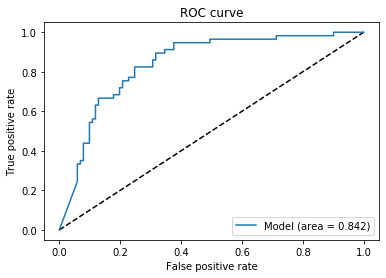

In [244]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_sq, tpr_sq, label='Model (area = {:.3f})'.format(auc_sq))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


In [245]:
#Area under the ROC curve
roc_auc_score(Y_test, y_pred)


0.8415841584158416